### Relative Anomaly of CORDEX Inputs

In [1]:
import xarray
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import warnings
import matplotlib as mpl
import warnings

In [2]:
# 0 = Whole UK
# 1 = East Midlands
# 2 = East of England
# 3 = East Scotland
# 4 = London
# 5 = North-East England
# 6 = North Scotland
# 7 = North-West England
# 8 = South-East England
# 9 = South-West England
# 10 = West Midlands
# 11 = West Scotland
# 12 = Yorkshire and Humberside
# 13 = Channel Islands?
# 14 = Isle of Man?
# 15 = Northern Ireland
# 16 = Wales

In [3]:
def get_cordex_addresses():
    models = pd.read_csv('cordex_models.txt', sep='\t')

    # Getting file strings:
        # Directories:
    root = '/data/met/ukcordex/'
    directories = [root + models['GCM'][i] + '/' +
                   models['RCM'][i] + '/' +
                   models['Ensemble'][i] + '/dmo/'
                   for i in range(models.shape[0])]

        # Filenames:
    #feat. clunky for loops and error handling!
    tas_files  = []
    hurs_files = []
    pr_files   = []
    wind_files = []
    err_indexs = []
    print(type(err_indexs))
    for i in range(models.shape[0]):
        try:
            for f_name in os.listdir(directories[i]):
                if f_name.startswith('tas_'):
                    tas_files.append(str(f_name))
                if f_name.startswith('hurs_'):
                    hurs_files.append(str(f_name))
                if f_name.startswith('sfcWind_'):
                    wind_files.append(str(f_name))
                if f_name.startswith('pr_'):
                    pr_files.append(str(f_name))

        except OSError as error:
            print(f'Inelligible directory at: {directories[i]}')
            err_indexs.append(int(i))


    for i in range(len(err_indexs)):
        del directories[err_indexs[i]]
    
    return directories,tas_files,hurs_files,wind_files,pr_files

In [4]:
region_data  = xarray.open_dataset('/home/theo/data/ukcp18-uk-land-region-rll.nc')
region_mask = region_data.admin_region
region_mask = np.nan_to_num(region_mask)
directories,tas_files,hurs_files,wind_files,pr_files = get_cordex_addresses()
mask = (region_mask == 0).astype(int)
mask = np.logical_not(mask)
print(np.unique(mask))

<class 'list'>
[False  True]


(array([1., 0., 1., 1., 0., 1., 1., 1., 2., 1., 1., 1., 3., 0., 4., 4., 2.,
        1., 1., 1., 1., 0., 1., 2., 0., 3., 2., 1., 1., 1., 3., 0., 0., 1.,
        2., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([12.11037726, 12.18730931, 12.26424136, 12.34117341, 12.41810546,
        12.4950375 , 12.57196955, 12.6489016 , 12.72583365, 12.80276569,
        12.87969774, 12.95662979, 13.03356184, 13.11049389, 13.18742593,
        13.26435798, 13.34129003, 13.41822208, 13.49515412, 13.57208617,
        13.64901822, 13.72595027, 13.80288232, 13.87981436, 13.95674641,
        14.03367846, 14.11061051, 14.18754255, 14.2644746 , 14.34140665,
        14.4183387 , 14.49527075, 14.57220279, 14.64913484, 14.72606689,
        14.80299894, 14.87993098, 14.95686303, 15.03379508, 15.11072713,
        15.18765918, 15.26459122, 15.34152327, 15.41845532, 15.49538737,
        15.57231941, 15.64925146, 15.72618351]),
 <BarContainer object of 47 artists>)

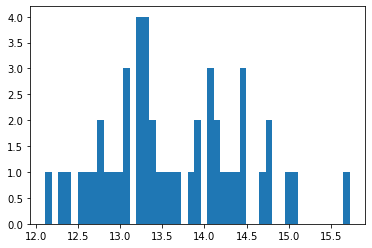

In [5]:
j = 0 
tas_file_names = [f'/home/theo/outdata/01_data/tas_model_{i+1}_region_{j}_summer.npy' 
              for i in range(1,49)]
tas_data = np.array([np.load(fname) for fname in tas_file_names])
hurs_file_names = [f'/home/theo/outdata/01_data/hurs_model_{i+1}_region_{j}_summer.npy' 
              for i in range(1,49)]
hurs_data = np.array([np.load(fname) for fname in hurs_file_names])
wind_file_names = [f'/home/theo/outdata/01_data/wind_model_{i+1}_region_{j}_summer.npy' 
              for i in range(1,49)]
wind_data = np.array([np.load(fname) for fname in wind_file_names])
pr_file_names = [f'/home/theo/outdata/01_data/pr_model_{i+1}_region_{j}_summer.npy' 
              for i in range(1,49)]
pr_data = np.array([np.load(fname) for fname in pr_file_names])

plt.hist(np.average(tas_data[:,1:21],axis=1),bins=47)

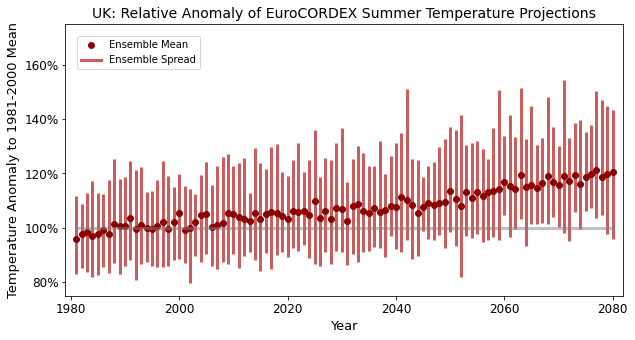

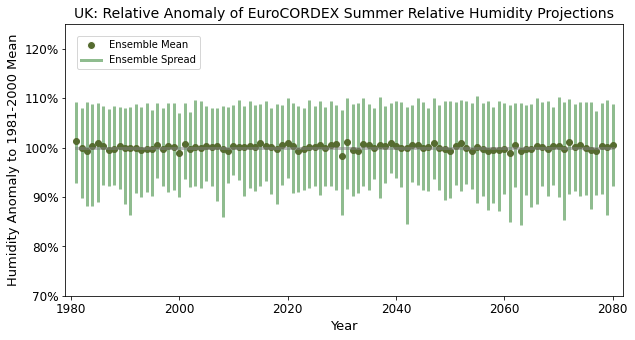

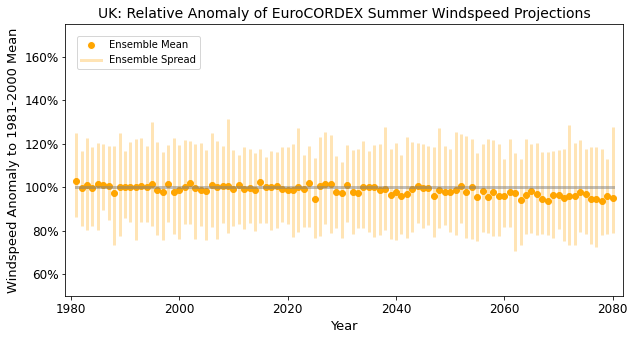

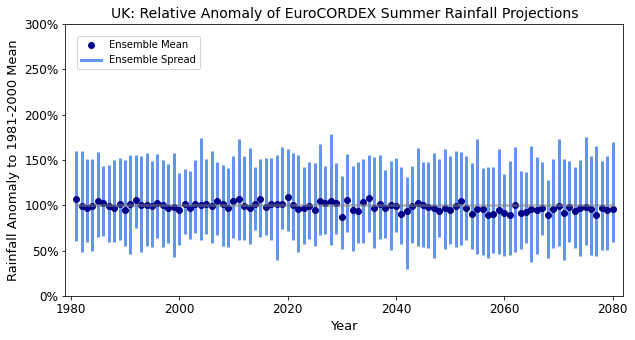

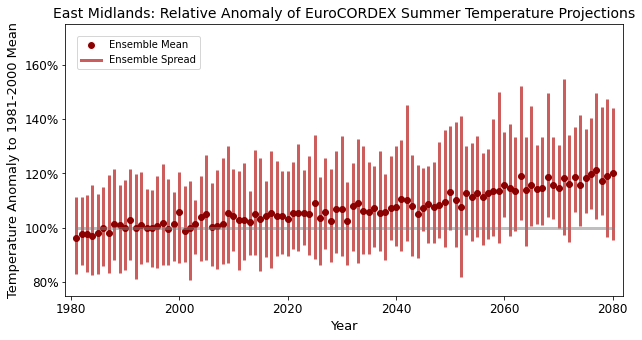

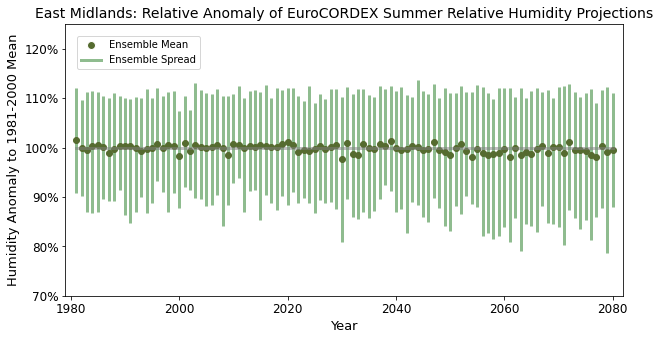

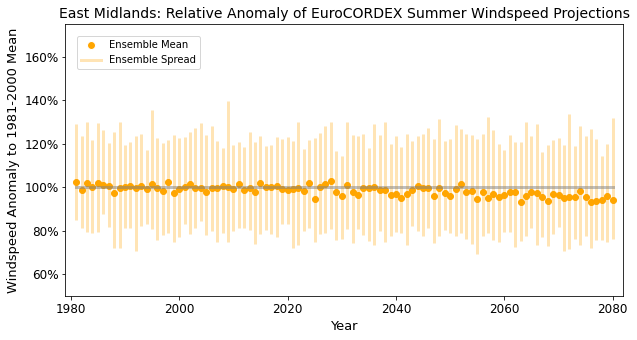

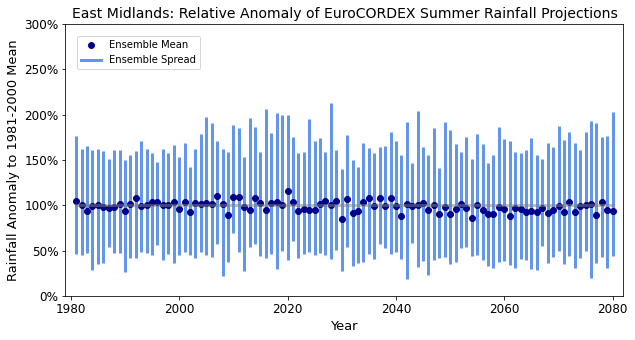

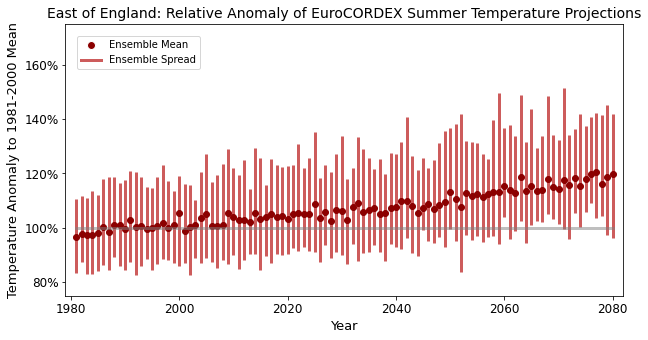

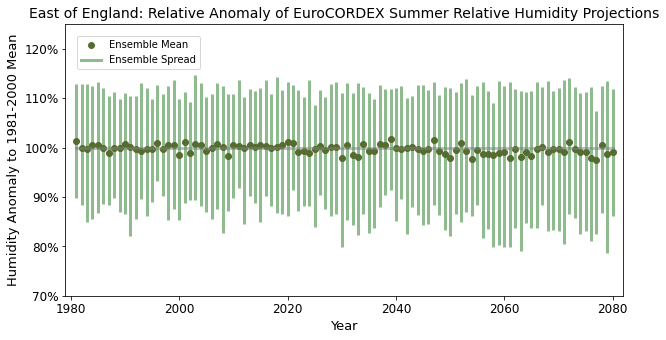

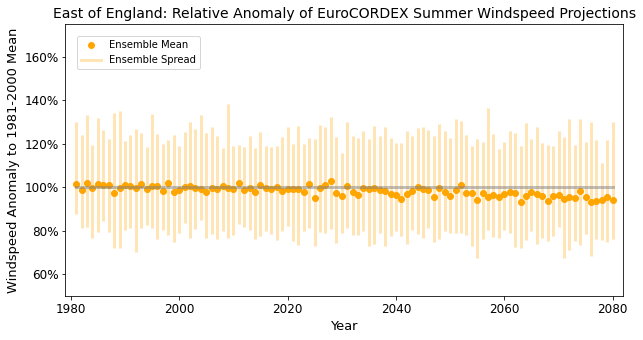

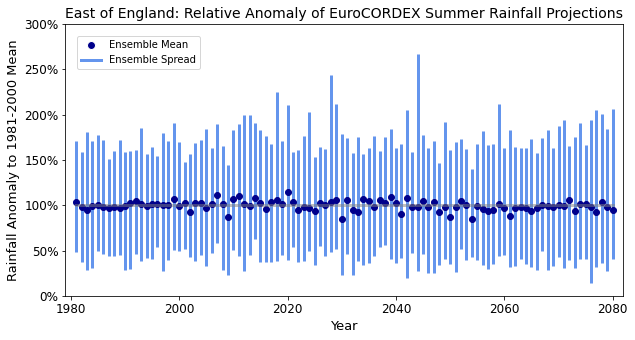

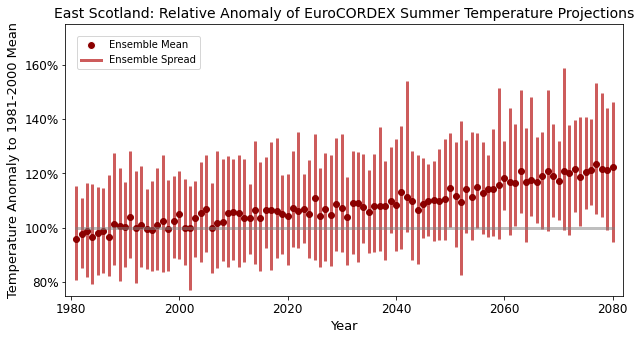

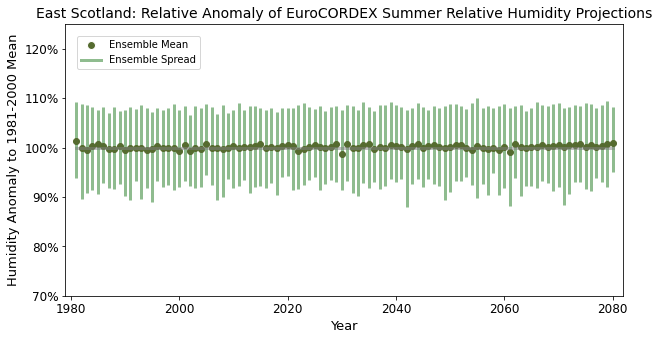

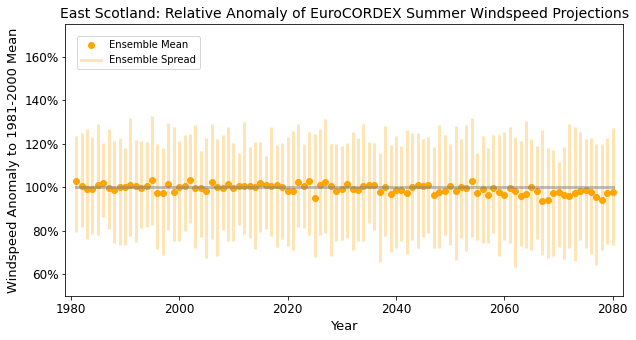

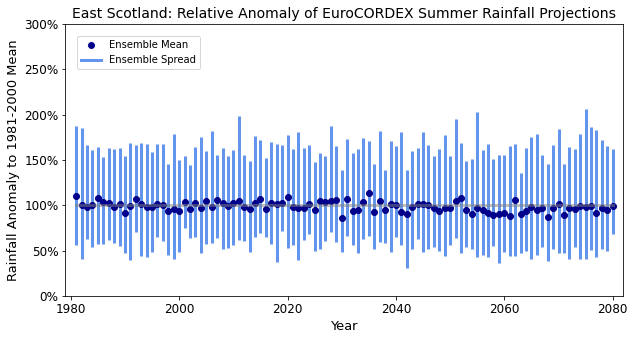

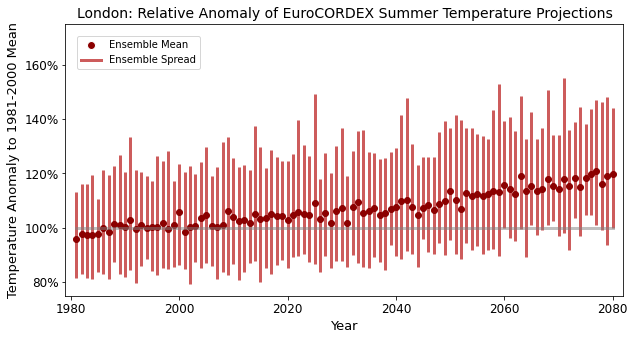

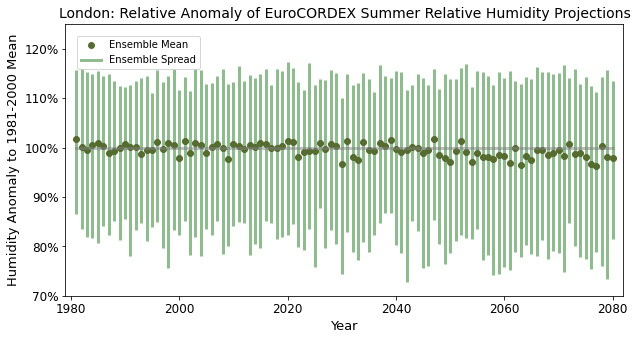

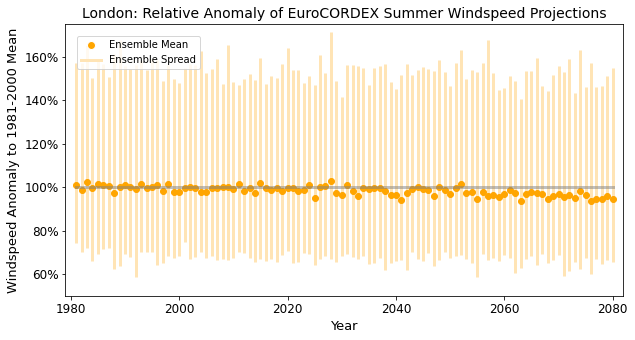

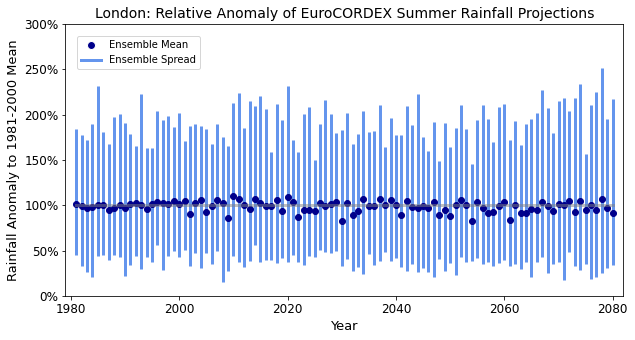

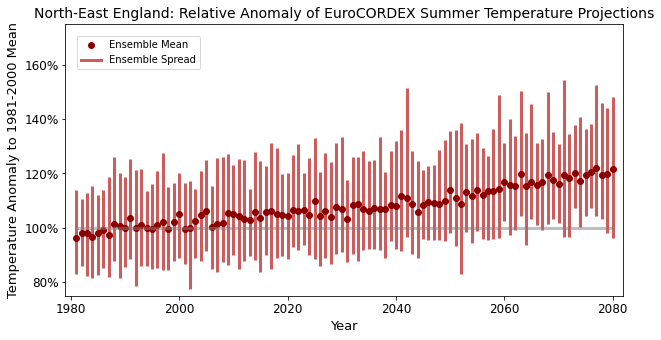

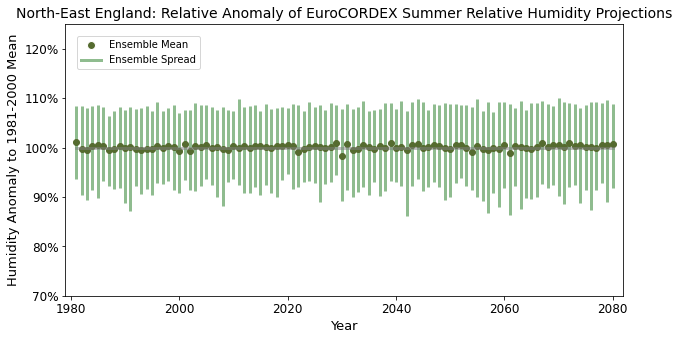

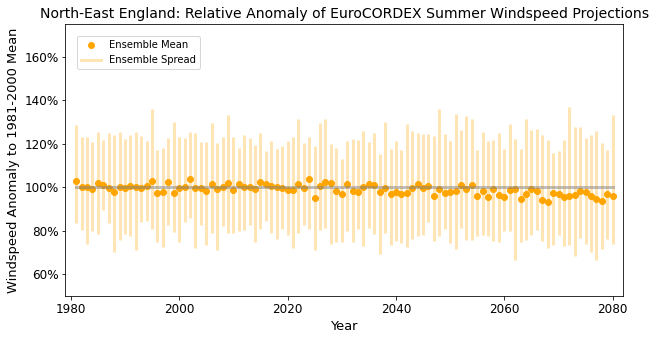

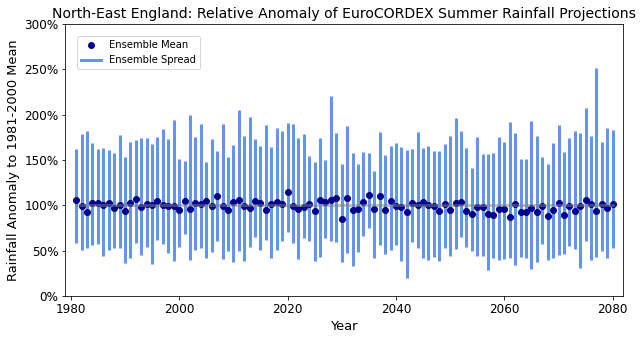

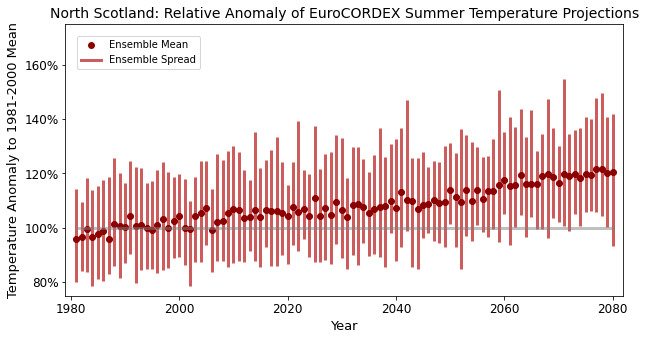

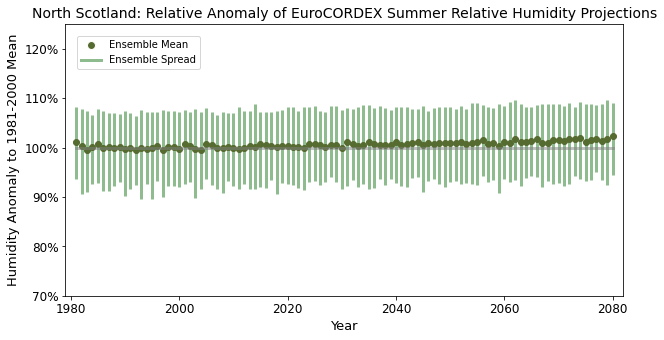

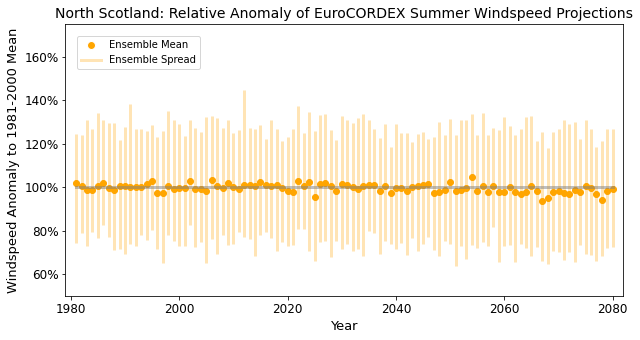

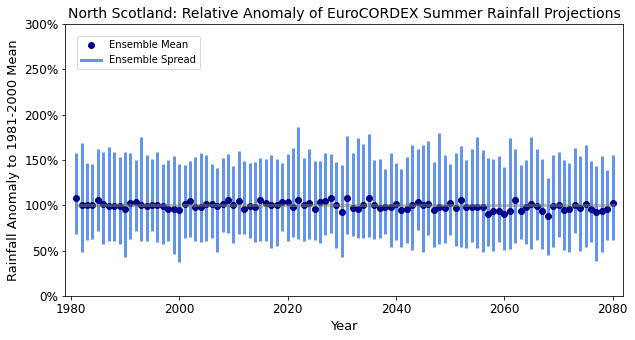

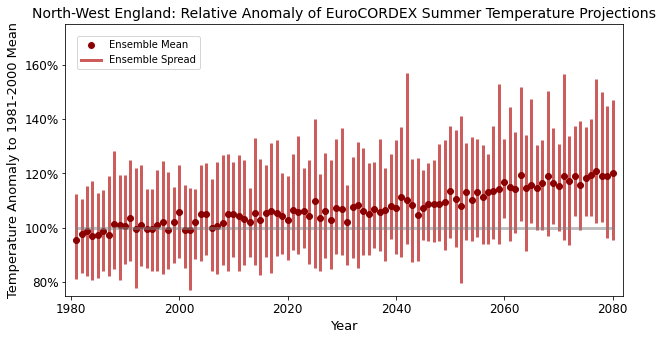

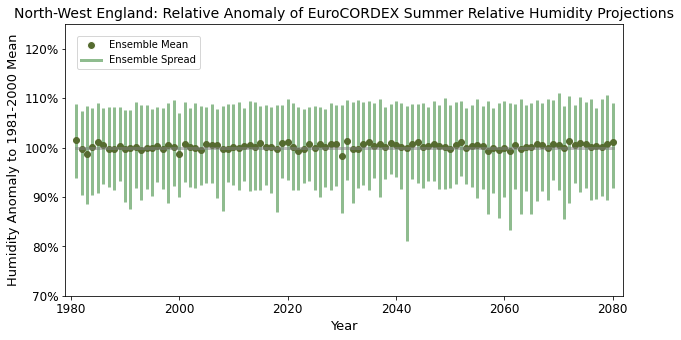

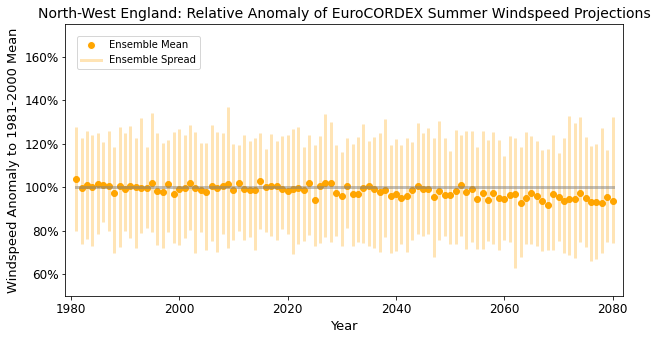

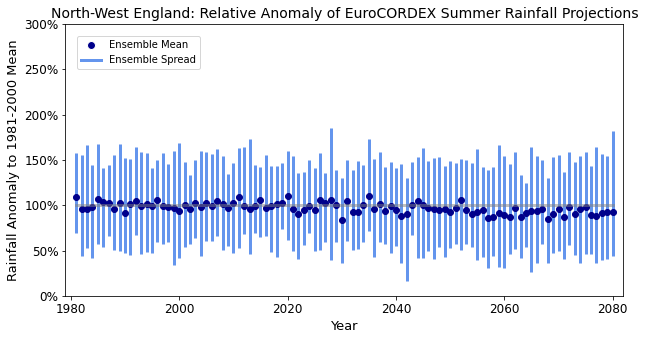

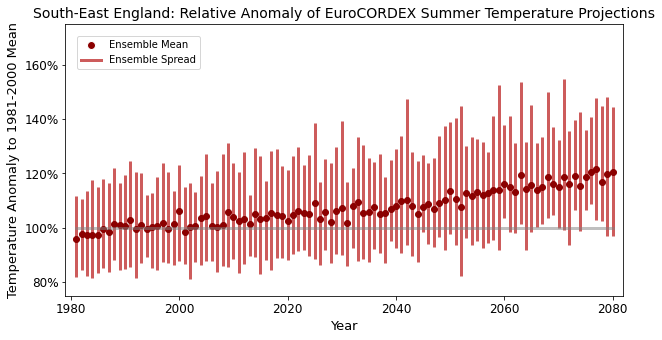

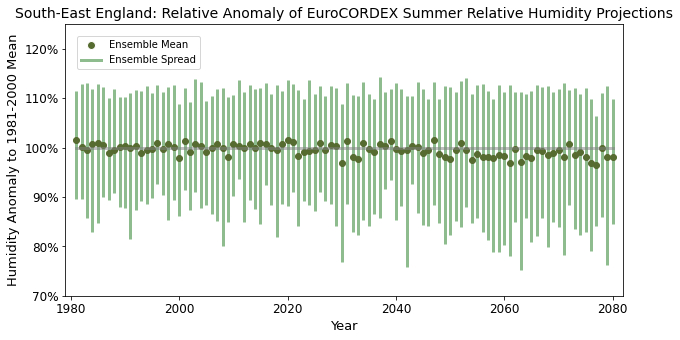

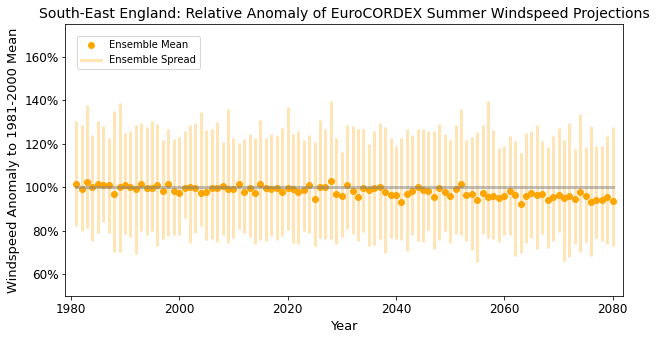

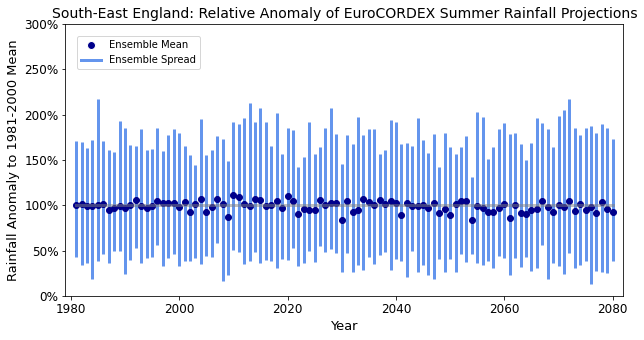

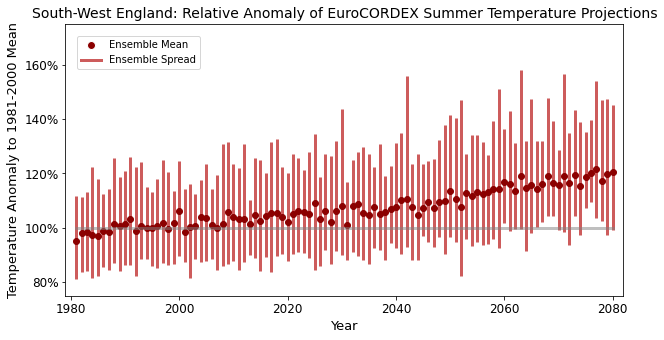

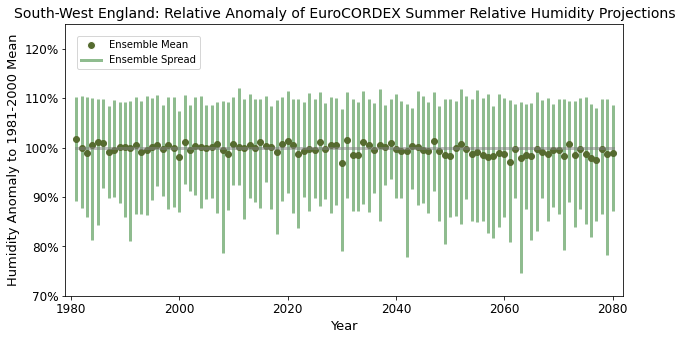

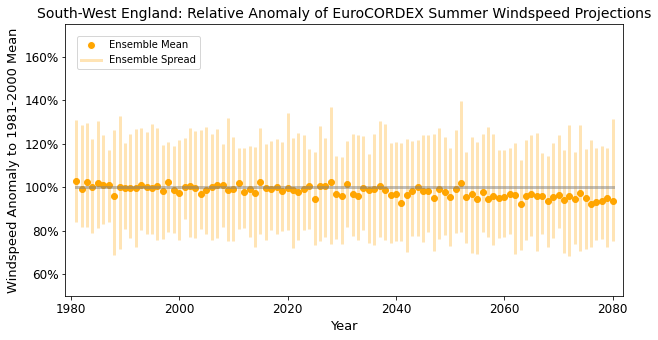

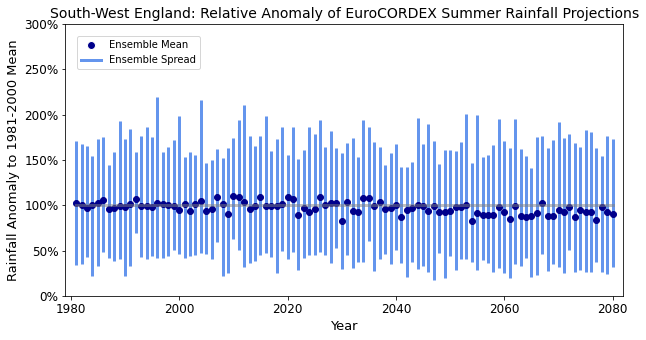

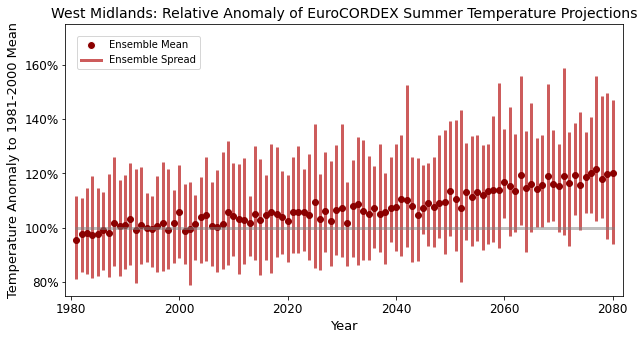

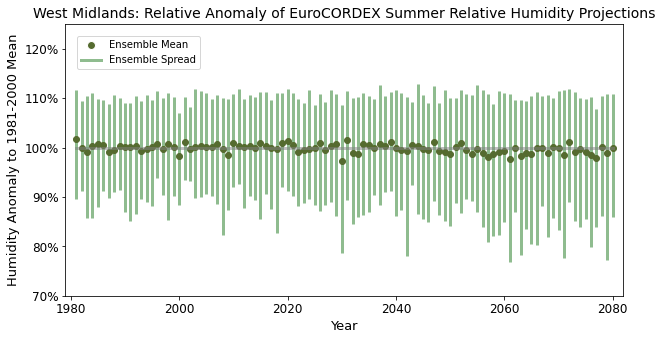

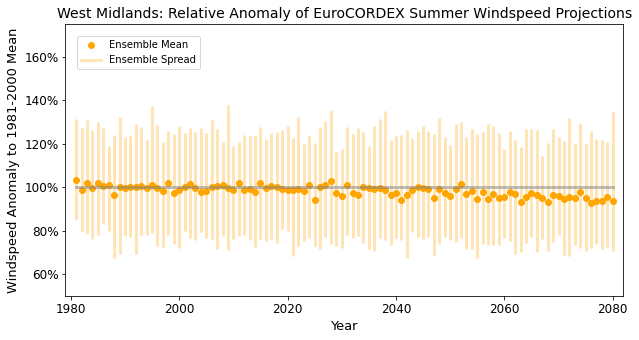

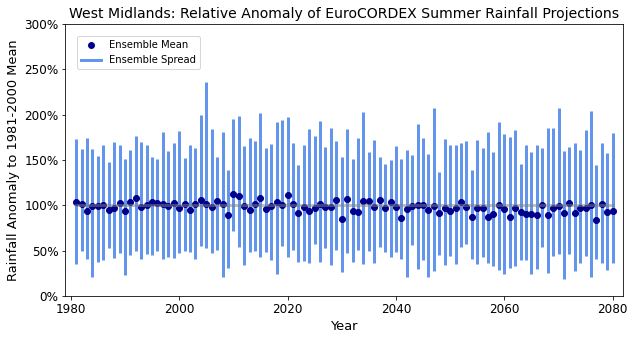

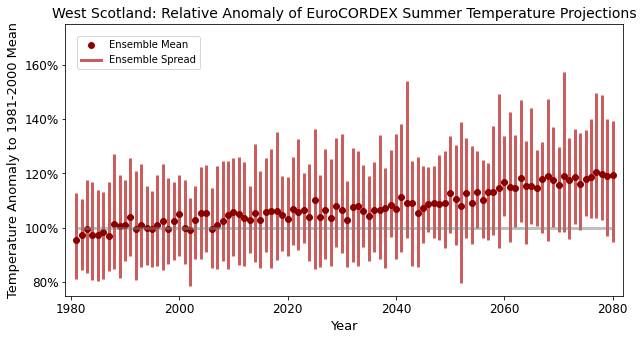

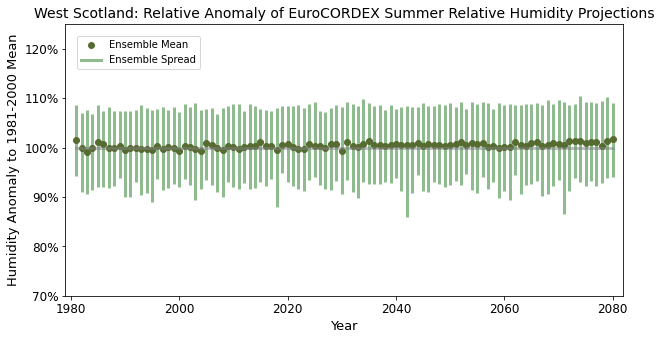

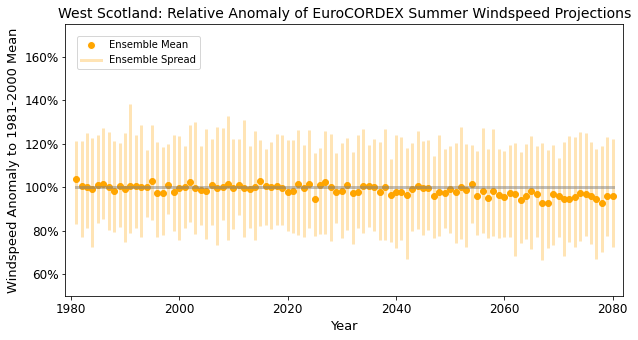

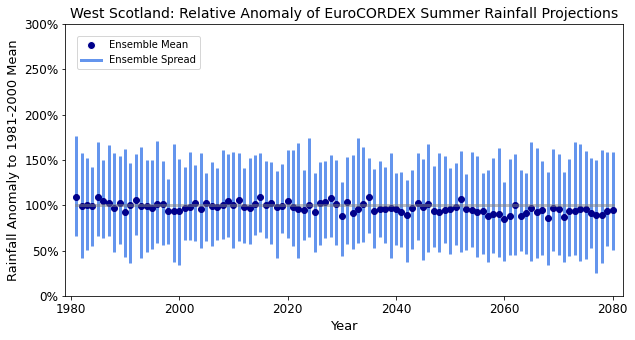

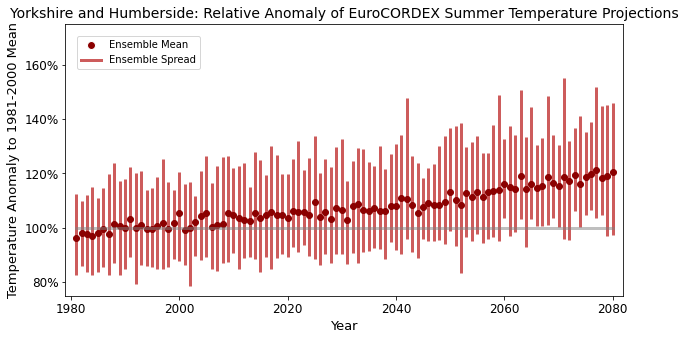

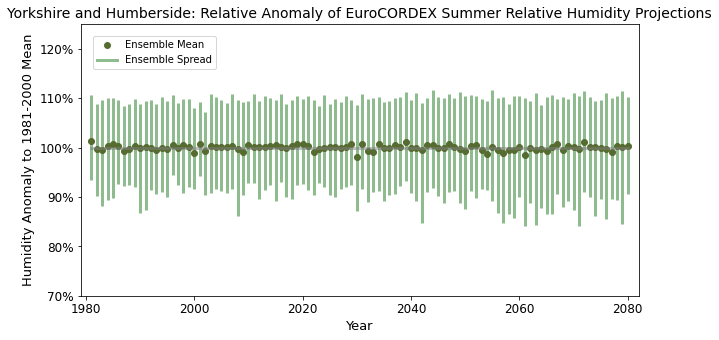

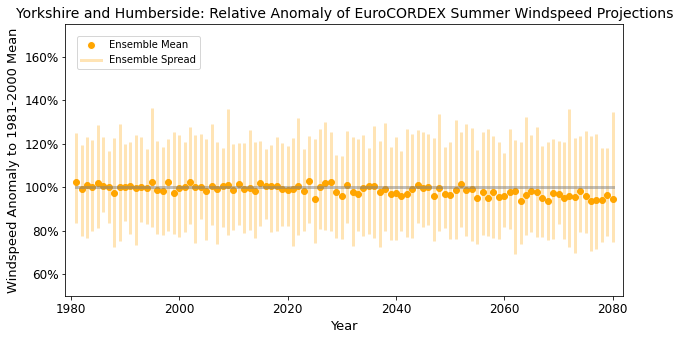

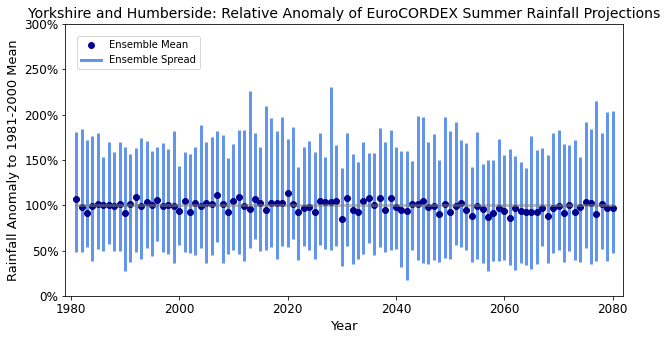

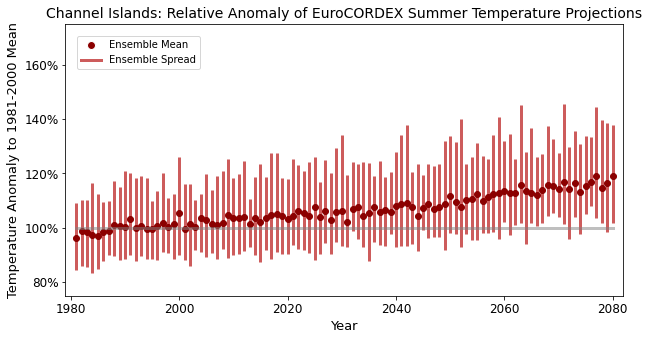

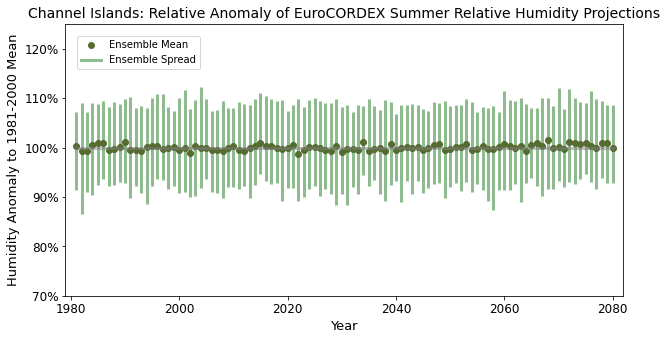

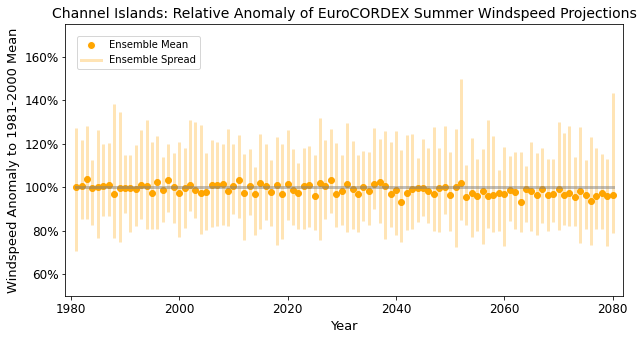

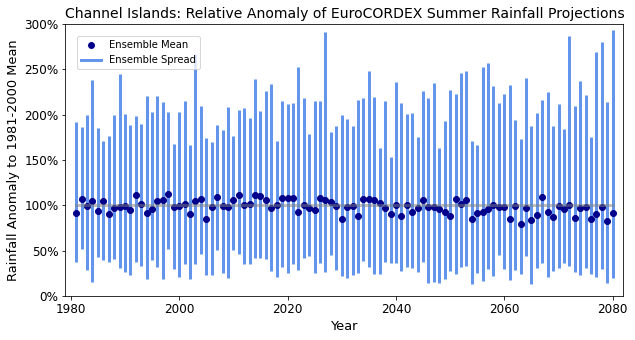

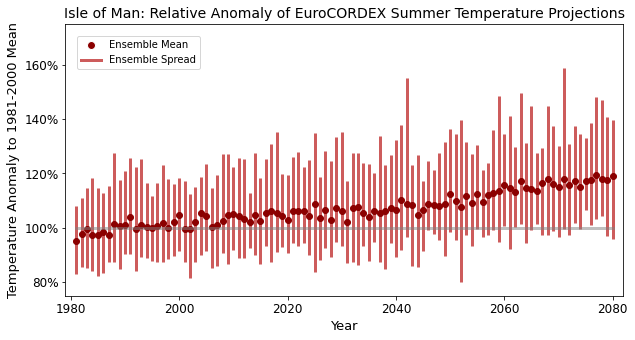

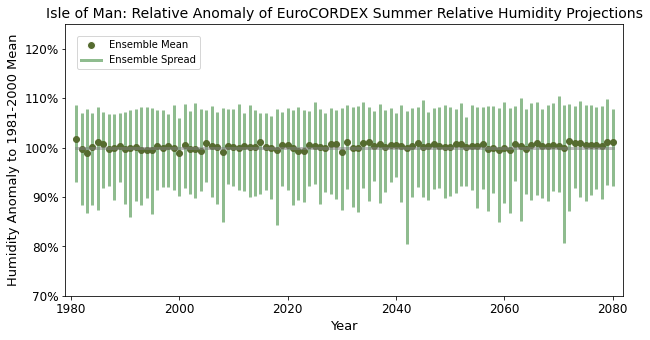

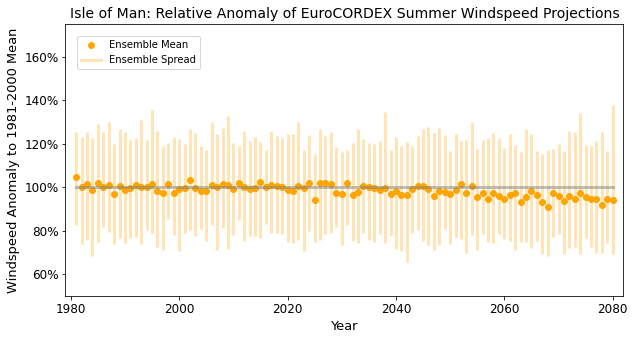

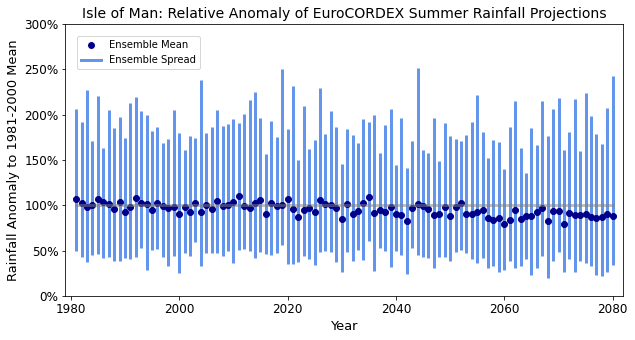

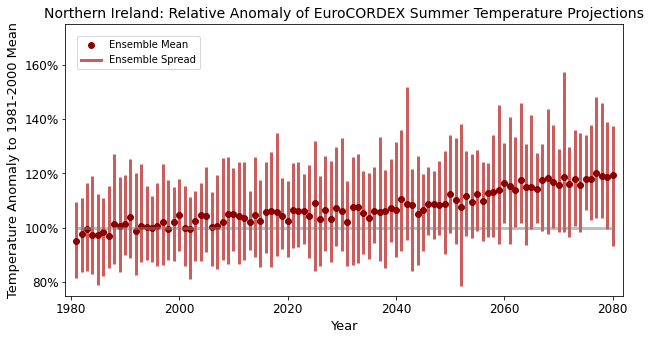

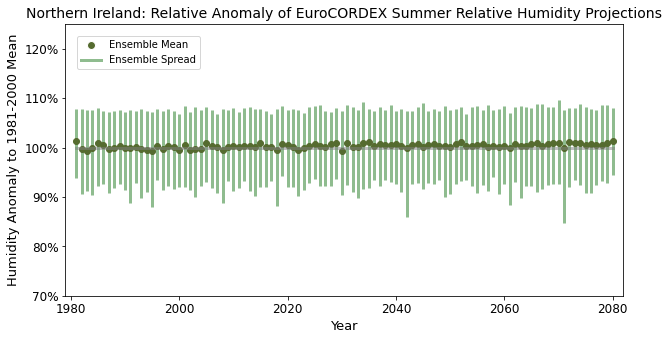

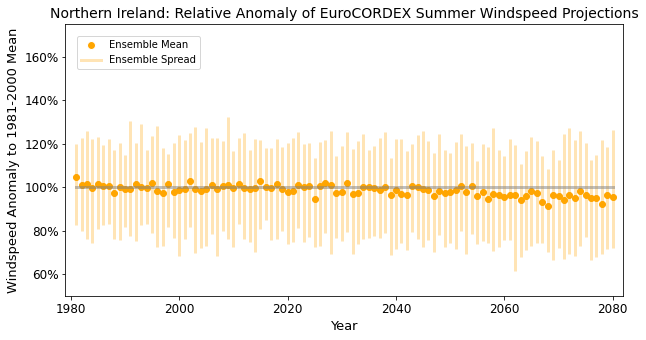

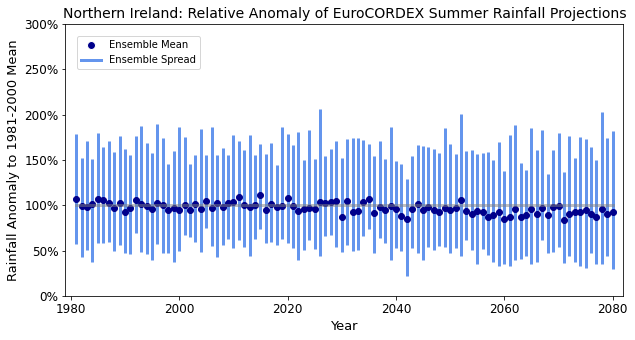

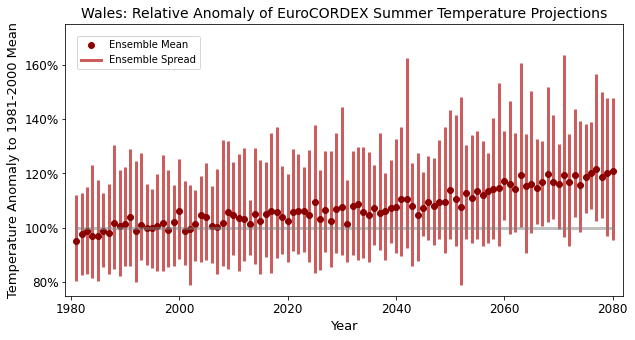

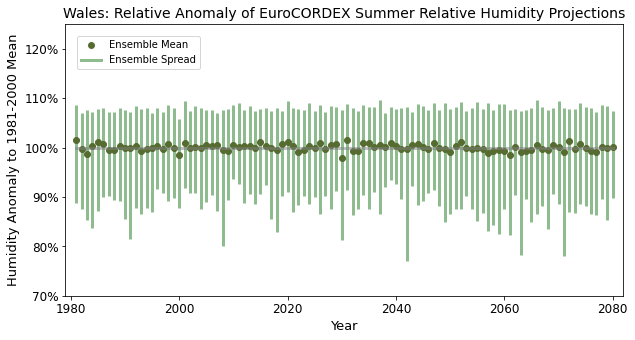

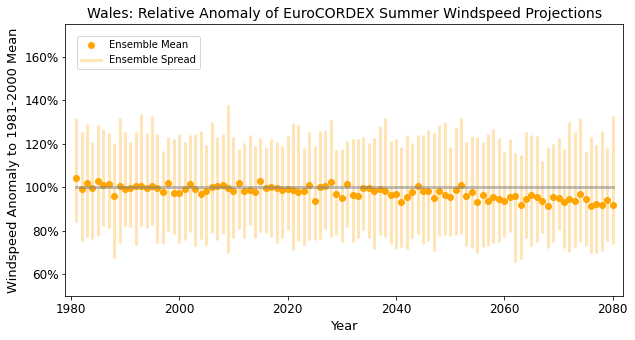

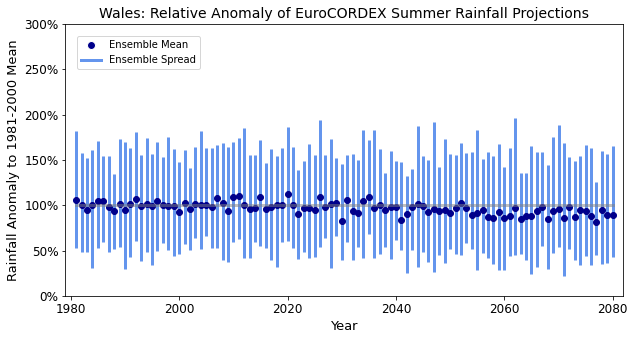

In [6]:
# Making plot:
ids = ['UK', 'East Midlands', 'East of England',
       'East Scotland','London','North-East England',
       'North Scotland','North-West England',
       'South-East England','South-West England',
       'West Midlands','West Scotland',
       'Yorkshire and Humberside',
       'Channel Islands',
       'Isle of Man',
       'Northern Ireland','Wales']
save_ids = ['uk', 'e_mdls', 'e_eng',
       'e_scot','ldn','ne_eng',
       'n_scot','nw_eng',
       'se_eng','sw_eng',
       'w_mdls','w_scot',
       'yorks_n_hums',
       'chnl_isl',
       'isl_man',
       'n_irln','wales']
for j in range(17):
    # Loading data:
    tas_file_names = [f'/home/theo/outdata/01_data/tas_model_{i+1}_region_{j}_summer.npy' 
                  for i in range(1,49)]
    tas_data = np.array([np.load(fname) for fname in tas_file_names])
    hurs_file_names = [f'/home/theo/outdata/01_data/hurs_model_{i+1}_region_{j}_summer.npy' 
                  for i in range(1,49)]
    hurs_data = np.array([np.load(fname) for fname in hurs_file_names])
    wind_file_names = [f'/home/theo/outdata/01_data/wind_model_{i+1}_region_{j}_summer.npy' 
                  for i in range(1,49)]
    wind_data = np.array([np.load(fname) for fname in wind_file_names])
    pr_file_names = [f'/home/theo/outdata/01_data/pr_model_{i+1}_region_{j}_summer.npy' 
                  for i in range(1,49)]
    pr_data = np.array([np.load(fname) for fname in pr_file_names])
    
    tas_start = np.average(tas_data[:,1:21],axis=(0,1))
    hurs_start = np.average(hurs_data[:,1:21],axis=(0,1))
    wind_start = np.average(wind_data[:,1:21],axis=(0,1))
    pr_start = np.average(pr_data[:,1:21],axis=(0,1))
    
    rel_tas =  100*(tas_data/tas_start)
    rel_hurs = 100*(hurs_data/hurs_start)
    rel_wind = 100*(wind_data/wind_start)
    rel_pr =   100*(pr_data/pr_start)
    
    
    dates = np.array([1980 + i for i in range(101)])
    
    del tas_data,hurs_data,wind_data,pr_data
    
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
    
        # Plotting Temperature:
        plt.figure(figsize=(10, 5))
        plt.errorbar(dates, np.nanmean(rel_tas,axis = 0), 
                     yerr=np.stack((np.nanmean(rel_tas,axis = 0) - np.nanmin(rel_tas,axis = 0),
                                    np.nanmax(rel_tas,axis = 0) - np.nanmean(rel_tas,axis = 0))), 
                     fmt='o', color='darkred', ecolor='indianred', 
                     elinewidth=3, capsize=0,zorder=2)
        plt.plot(dates[1:101],(dates[1:101]*0+100),linewidth=3,color='gray',zorder=3,alpha=0.5)
        plt.title(f'{ids[j]}: Relative Anomaly of EuroCORDEX Summer Temperature Projections',fontsize=14)
        handles = [mpl.lines.Line2D([0], [0], marker='o', color='w',markerfacecolor='darkred', markersize=8),
                   mpl.lines.Line2D([0], [0], color='indianred', linewidth=3, linestyle='-')]
        plt.legend(handles,['Ensemble Mean','Ensemble Spread'],loc=2,borderaxespad=1.2)
        plt.xlabel('Year',fontsize=13)
        plt.ylabel('Temperature Anomaly to 1981-2000 Mean',fontsize=13)
        plt.xticks(fontsize = 12)
        plt.yticks(fontsize = 12)
        plt.margins(x=0.02)
        plt.ylim(75,175)
        plt.gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter(u"{x:.0f}%"))
        plt.savefig(f'/home/theo/final_images/1.3.images/summer_tas_mean_{save_ids[j]}')

        # Plotting Relative Humidity:
        plt.figure(figsize=(10, 5))
        plt.errorbar(dates, np.nanmean(rel_hurs,axis = 0), 
                     yerr=np.stack((np.nanmean(rel_hurs,axis = 0) - np.nanmin(rel_hurs,axis = 0),
                                    np.nanmax(rel_hurs,axis = 0) - np.nanmean(rel_hurs,axis = 0))), 
                     fmt='o', color='darkolivegreen', ecolor='darkseagreen', 
                     elinewidth=3, capsize=0,zorder=2)
        plt.plot(dates[1:101],(dates[1:101]*0+100),linewidth=3,color='gray',zorder=3,alpha=0.5)
        plt.title(f'{ids[j]}: Relative Anomaly of EuroCORDEX Summer Relative Humidity Projections',fontsize=14)
        handles = [mpl.lines.Line2D([0], [0], marker='o', color='w',markerfacecolor='darkolivegreen', markersize=8),
                   mpl.lines.Line2D([0], [0], color='darkseagreen', linewidth=3, linestyle='-')]
        plt.legend(handles,['Ensemble Mean','Ensemble Spread'],loc=2,borderaxespad=1.2)
        plt.xlabel('Year',fontsize=13)
        plt.ylabel('Humidity Anomaly to 1981-2000 Mean',fontsize=13)
        plt.xticks(fontsize = 12)
        plt.yticks(fontsize = 12)
        plt.margins(x=0.02) 
        plt.ylim(70,125)
        plt.gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter(u"{x:.0f}%"))
        plt.savefig(f'/home/theo/final_images/1.3.images/summer_hurs_mean_{save_ids[j]}')

        # Plotting Wind:
        plt.figure(figsize=(10, 5))
        plt.errorbar(dates, np.nanmean(rel_wind,axis = 0), 
                     yerr=np.stack((np.nanmean(rel_wind,axis = 0) - np.nanmin(rel_wind,axis = 0),
                                    np.nanmax(rel_wind,axis = 0) - np.nanmean(rel_wind,axis = 0))), 
                     fmt='o', color='orange', ecolor='moccasin', 
                     elinewidth=3, capsize=0,zorder=2)
        plt.plot(dates[1:101],(dates[1:101]*0+100),linewidth=3,color='gray',zorder=3,alpha=0.5)
        plt.title(f'{ids[j]}: Relative Anomaly of EuroCORDEX Summer Windspeed Projections',fontsize=14)
        handles = [mpl.lines.Line2D([0], [0], marker='o', color='w',markerfacecolor='orange', markersize=8),
                   mpl.lines.Line2D([0], [0], color='moccasin', linewidth=3, linestyle='-')]
        plt.legend(handles,['Ensemble Mean','Ensemble Spread'],loc=2,borderaxespad=1.2)
        plt.xlabel('Year',fontsize=13)
        plt.ylabel('Windspeed Anomaly to 1981-2000 Mean',fontsize=13)
        plt.xticks(fontsize = 12)
        plt.yticks(fontsize = 12)
        plt.margins(x=0.02)      
        plt.ylim(50,175)
        plt.gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter(u"{x:.0f}%"))
        plt.savefig(f'/home/theo/final_images/1.3.images/summer_wind_mean_{save_ids[j]}')

        # Plotting Rainfall:
        plt.figure(figsize=(10, 5))
        plt.errorbar(dates, np.nanmean(rel_pr,axis = 0), 
                     yerr=np.stack((np.nanmean(rel_pr,axis = 0) - np.nanmin(rel_pr,axis = 0),
                                    np.nanmax(rel_pr,axis = 0) - np.nanmean(rel_pr,axis = 0))), 
                     fmt='o', color='darkblue', ecolor='cornflowerblue', 
                     elinewidth=3, capsize=0,zorder=2)
        plt.plot(dates[1:101],(dates[1:101]*0+100),linewidth=3,color='gray',zorder=3,alpha=0.5)
        plt.title(f'{ids[j]}: Relative Anomaly of EuroCORDEX Summer Rainfall Projections',fontsize=14)
        handles = [mpl.lines.Line2D([0], [0], marker='o', color='w',markerfacecolor='darkblue', markersize=8),
                   mpl.lines.Line2D([0], [0], color='cornflowerblue', linewidth=3, linestyle='-')]
        plt.legend(handles,['Ensemble Mean','Ensemble Spread'],loc=2,borderaxespad=1.2)
        plt.xlabel('Year',fontsize=13)
        plt.ylabel('Rainfall Anomaly to 1981-2000 Mean',fontsize=13)
        plt.xticks(fontsize = 12)
        plt.yticks(fontsize = 12)
        plt.margins(x=0.02)      
        plt.ylim(0,300)
        plt.gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter(u"{x:.0f}%"))
        plt.savefig(f'/home/theo/final_images/1.3.images/summer_pr_mean_{save_ids[j]}')